# MARCOnI

Original website: http://marconi.mpi-inf.mpg.de 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../')
from pak import utils
from pak.datasets.MARCOnI import MARCOnI
import matplotlib.pyplot as plt

root = '/home/julian/Data/pak_test1'

marconi = MARCOnI(root)

X, CNN = marconi['Soccer']

(MARCOnl)
	Soccer finished
	Kickbox finished
	SBoard finished
	Soccer2 finished
	Walk1 finished
	Walk2 finished
	Volleyball finished
	Juggling finished
	Run2 finished


(5, 510, 360, 640, 14)


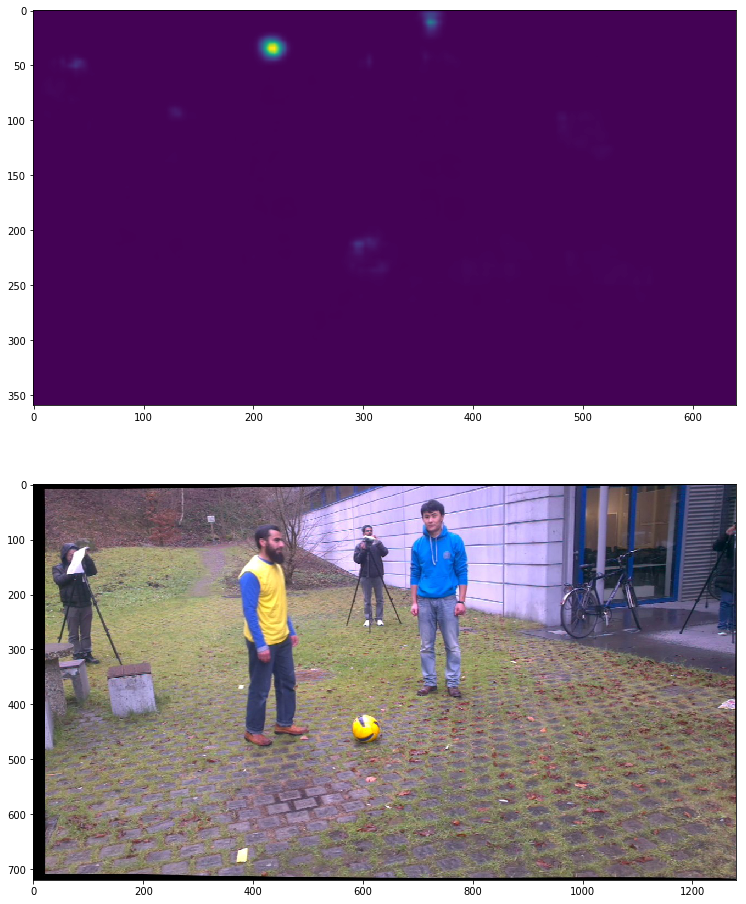

In [2]:
print(CNN.shape)

#print(np.max(CNN))
a = CNN[0,0,:,:,0]
im = X[0,0]
fig = plt.figure(figsize=(16,16))

fig.add_subplot(211).imshow(a)
fig.add_subplot(212).imshow(im)
plt.show()

[-1, '-1.0', -1]


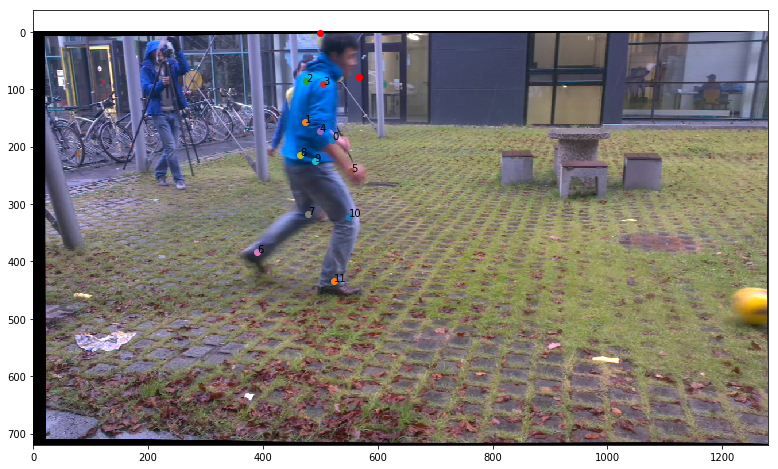

In [3]:
from os import makedirs, listdir
from os.path import join, isfile, isdir, exists, splitext
from scipy.io import loadmat

cam = 4
frame = 479
#frame = 5

im = X[cam,frame]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.imshow(im)

annot_url = '/home/julian/Data/pak_test1/marconi/Soccer/Annotations.mat'


M = loadmat(annot_url)
annolist = M['annolist'][0]

# for elem in annolist:
#     a,b,c = elem
#     name = a[0][0][0][0]

elem = annolist[frame + (cam * 510)]
a,b,_ = elem

name = a[0][0][0][0]

individuals = b[0]

# 0 - left hand
# 1 - left elbow
# 2 - left shoulder
# 3 - right shoulder
# 4 - right elbow
# 5 - right hand
# 6 - left foot
# 7 - left knee
# 8 - left hip
# 9 - right hip
# 10- right knee
# 11- right foot
def checkout_item(item):
    a,b,c,d,e,f,g,h,j = item
#     print("------------------------------")
#     print("")
#     print([e,f,g])
#     print("")
#     print("------------------------------")
    
    
    a = a[0][0]; b = b[0][0]
    c = c[0][0]; d = d[0][0]
    e = e[0][0]; g = g[0][0]; f = f[0]
    
    #print(f)
    print([e,f,g])
    
    ax.scatter([a, c], [b, d], color='red')
    
    joints = h[0][0][0][0]  # x, y, id, visible
    for jidx, joint in enumerate(joints):
        x, y, pid, visible = joint
        x = x[0][0]
        y = y[0][0]
        ax.scatter(x, y)
        ax.text(x, y, str(jidx))


    
checkout_item(individuals[0])
#checkout_item(individuals[1])


# print(len(b[0][0]))
# for xx in b[0][0]:
#     print(xx)


plt.show()

In [4]:
for frame_, a in enumerate(annolist):
    if len(a[1][0]) == 1 and frame_ > frame + (cam * 510):
        print(str(frame_) + ":" +  str(len(a[1][0])))

In [5]:
Annotation = marconi.get_annotations('Soccer')

In [19]:
from skvideo.io import vwrite
import cv2

X1 = X[0].astype('uint8')[0:10]
Annot1 = Annotation[0]


COLORS = ((255,0,0), (0,255,0))

for Im, Annot in zip(X1, Annot1):
    for pid, individual in enumerate(Annot):
        if individual[0] is not None:
            (x1,y1), (x2,y2) = individual[0]
            cv2.rectangle(Im,
                          (int(x1),int(y1)), (int(x2),int(y2)), 
                          color=COLORS[pid])


vwrite('/home/julian/Temp/video.mp4', X1)